In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [3]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
IMAGE_SIZE = [100, 100]

In [5]:
train_path = '/content/drive/MyDrive/10 monkey/training/training'
valid_path = '/content/drive/MyDrive/10 monkey/validation/validation'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
folder = glob('/content/drive/MyDrive/10 monkey/training/training/*')

In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [12]:
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1145 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
36/36 [==============================] - 605s 16s/step - loss: 2.2993 - accuracy: 0.1975 - val_loss: 1.5622 - val_accuracy: 0.5037
Epoch 2/25
36/36 [==============================] - 34s 965ms/step - loss: 1.4247 - accuracy: 0.5333 - val_loss: 1.3133 - val_accuracy: 0.5809
Epoch 3/25
36/36 [==============================] - 34s 964ms/step - loss: 1.1543 - accuracy: 0.6483 - val_loss: 1.1607 - val_accuracy: 0.6728
Epoch 4/25
36/36 [==============================] - 36s 994ms/step - loss: 0.9710 - accuracy: 0.7188 - val_loss: 1.1223 - val_accuracy: 0.6324
Epoch 5/25
36/36 [==============================] - 35s 978ms/step - loss: 0.8680 - accuracy: 0.7470 - val_loss: 1.0721 - val_accuracy: 0.6397
Epoch 6/25
36/36 [==============================] - 35s 979ms/step - loss: 0.7627 - accuracy: 0.7834 - val_loss: 0.9881 - val_accuracy: 0.6765
Epoch 7/25
36/36 [==============================] - 35s 973ms/step - loss: 0.7026 - accuracy: 0.7987 - val_loss: 0.9784 - val_accuracy: 0.6875


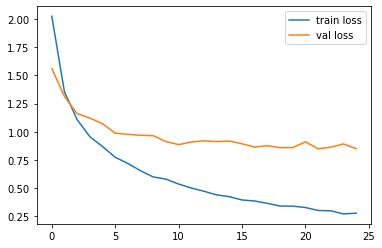

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

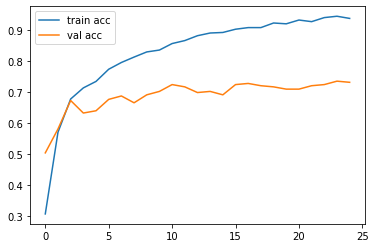

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**VGG19**

In [24]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input


In [25]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [26]:
for layer in vgg.layers:
  layer.trainable = False

In [27]:
x1 = Flatten()(vgg19.output)
prediction1 = Dense(len(folder), activation='softmax')(x1)

In [29]:
modelVGG19 = Model(inputs=vgg19.input, outputs=prediction1)

In [30]:
modelVGG19.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [31]:
modelVGG19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
r1 = modelVGG19.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
36/36 [==============================] - 38s 1s/step - loss: 4.0999 - accuracy: 0.0854 - val_loss: 2.3103 - val_accuracy: 0.1140
Epoch 2/25
36/36 [==============================] - 36s 962ms/step - loss: 2.3113 - accuracy: 0.0868 - val_loss: 2.3039 - val_accuracy: 0.1029
Epoch 3/25
36/36 [==============================] - 35s 974ms/step - loss: 2.3039 - accuracy: 0.0932 - val_loss: 2.3027 - val_accuracy: 0.0956
Epoch 4/25
36/36 [==============================] - 35s 958ms/step - loss: 2.3024 - accuracy: 0.1044 - val_loss: 2.3027 - val_accuracy: 0.0956
Epoch 5/25
36/36 [==============================] - 35s 979ms/step - loss: 2.3019 - accuracy: 0.1162 - val_loss: 2.3026 - val_accuracy: 0.0956
Epoch 6/25
36/36 [==============================] - 35s 978ms/step - loss: 2.3017 - accuracy: 0.1236 - val_loss: 2.3027 - val_accuracy: 0.0956
Epoch 7/25
36/36 [==============================] - 36s 1s/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.0956
Epoch

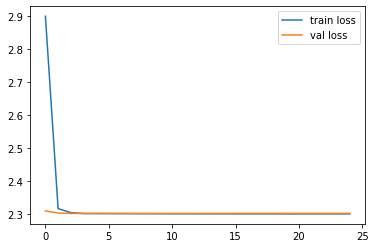

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

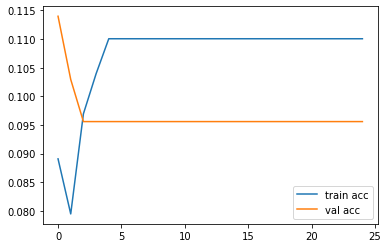

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

RESNET50

In [35]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

In [36]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [39]:
for layer in resnet50.layers:
  layer.trainable = False

In [40]:
x2 = Flatten()(resnet50.output)
prediction2 = Dense(len(folder), activation='softmax')(x2)

In [41]:
modelresnet50 = Model(inputs=resnet50.input, outputs=prediction2)

In [42]:
modelresnet50.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [44]:
modelresnet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [45]:
r2 = modelresnet50.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
36/36 [==============================] - 40s 1s/step - loss: 5.0191 - accuracy: 0.1269 - val_loss: 2.4257 - val_accuracy: 0.1728
Epoch 2/25
36/36 [==============================] - 35s 979ms/step - loss: 2.4536 - accuracy: 0.1846 - val_loss: 2.4177 - val_accuracy: 0.2096
Epoch 3/25
36/36 [==============================] - 35s 961ms/step - loss: 2.5342 - accuracy: 0.2128 - val_loss: 2.8374 - val_accuracy: 0.1544
Epoch 4/25
36/36 [==============================] - 35s 947ms/step - loss: 2.3620 - accuracy: 0.2293 - val_loss: 2.2859 - val_accuracy: 0.2684
Epoch 5/25
36/36 [==============================] - 35s 961ms/step - loss: 2.2677 - accuracy: 0.2643 - val_loss: 2.1699 - val_accuracy: 0.2647
Epoch 6/25
36/36 [==============================] - 34s 964ms/step - loss: 2.4551 - accuracy: 0.2080 - val_loss: 2.6093 - val_accuracy: 0.2426
Epoch 7/25
36/36 [==============================] - 34s 967ms/step - loss: 2.6816 - accuracy: 0.2278 - val_loss: 2.2621 - val_accuracy: 0.2794
Ep

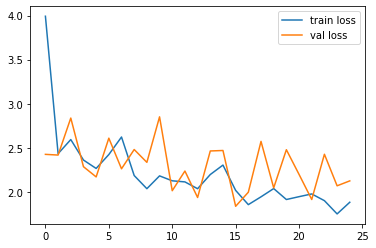

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

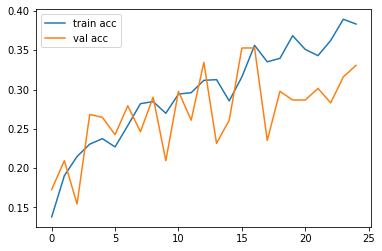

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**INCEPTION**

In [48]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [49]:
InceptionV3 =  InceptionV3(weights='imagenet', include_top=False)


87916544/87910968 [==============================] - 1s 0us/step


In [50]:
for layer in InceptionV3.layers:
  layer.trainable = False

In [52]:
x3 = GlobalAveragePooling2D()(InceptionV3.output)
prediction3 = Dense(len(folder), activation='softmax')(x3)

In [54]:
modelInceptionV3 = Model(inputs=InceptionV3.input, outputs=prediction3)

In [55]:
modelInceptionV3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [56]:
modelInceptionV3.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [57]:
r3 = modelInceptionV3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
36/36 [==============================] - 42s 1s/step - loss: 2.6085 - accuracy: 0.2615 - val_loss: 1.2773 - val_accuracy: 0.5662
Epoch 2/25
36/36 [==============================] - 34s 969ms/step - loss: 1.3175 - accuracy: 0.5704 - val_loss: 0.9418 - val_accuracy: 0.6912
Epoch 3/25
36/36 [==============================] - 34s 955ms/step - loss: 0.9073 - accuracy: 0.6901 - val_loss: 0.8771 - val_accuracy: 0.7243
Epoch 4/25
36/36 [==============================] - 34s 961ms/step - loss: 0.8307 - accuracy: 0.7281 - val_loss: 0.8420 - val_accuracy: 0.7206
Epoch 5/25
36/36 [==============================] - 34s 951ms/step - loss: 0.7052 - accuracy: 0.7690 - val_loss: 0.8006 - val_accuracy: 0.7537
Epoch 6/25
36/36 [==============================] - 34s 957ms/step - loss: 0.6805 - accuracy: 0.7732 - val_loss: 0.7693 - val_accuracy: 0.7647
Epoch 7/25
36/36 [==============================] - 34s 960ms/step - loss: 0.6537 - accuracy: 0.7912 - val_loss: 0.8993 - val_accuracy: 0.7463
Ep

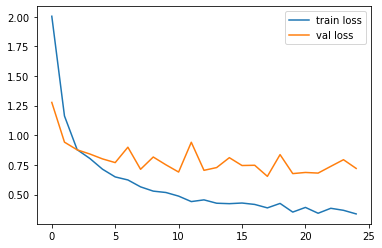

<Figure size 432x288 with 0 Axes>

In [58]:
plt.plot(r3.history['loss'], label='train loss')
plt.plot(r3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

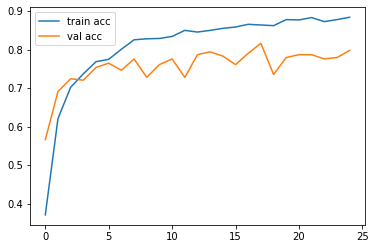

<Figure size 432x288 with 0 Axes>

In [59]:
plt.plot(r3.history['accuracy'], label='train acc')
plt.plot(r3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [60]:
import tensorflow as tf

from keras.models import load_model

model.save('model.h5')

r = load_model('model.h5')